In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [26]:
b1_T = pd.read_table(r'sasso/Bicocca1-A.Sample.Raw.csv', sep=',', skiprows=1, names=['wl', 'Tr'])
b1_T_bis = pd.read_table(r'sasso/Bicocca1-B.Sample.Raw.csv', sep=',', skiprows=1, names=['wl', 'Tr'])
b5_T = pd.read_table(r'sasso/Bicocca5-B.Sample.Raw.csv', sep=',', skiprows=1, names=['wl', 'Tr'])
b5_T_bis = pd.read_table(r'sasso/Bicocca5-A.Sample.Cycle1.Raw.csv', sep=',', skiprows=1, names=['wl', 'Tr'])

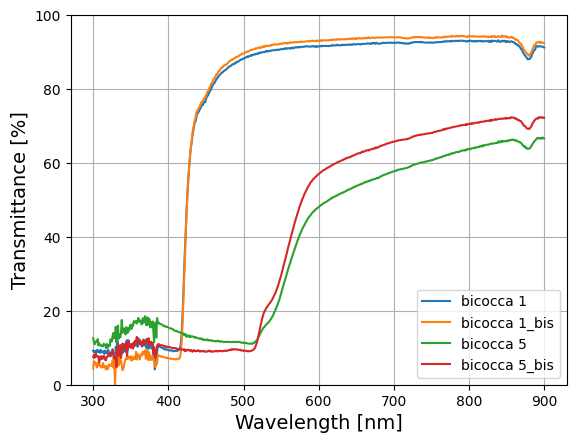

In [27]:
plt.plot(b1_T.wl, b1_T.Tr, label='bicocca 1')
plt.plot(b1_T_bis.wl, b1_T_bis.Tr, label='bicocca 1_bis')
plt.plot(b5_T.wl, b5_T.Tr, label='bicocca 5')
plt.plot(b5_T_bis.wl, b5_T_bis.Tr, label='bicocca 5_bis')
plt.grid()
plt.ylabel('Transmittance [%]', size=14)
plt.xlabel('Wavelength [nm]', size=14)
plt.ylim(0, 100)
plt.legend()

### loading files

In [28]:
b1 = pd.read_table(r'Bicocca1_300_420_MAP.dat', skiprows=31, sep='\t', names=['x', 'y', 'z'])

In [29]:
b5 = pd.read_table(r'Bicocca5_300_420_MAP.dat', skiprows=31, sep='\t', names=['x', 'y', 'z'])

In [30]:
dt = pd.read_table(r'Detec_300_420_MAP.dat', skiprows=31, sep='\t', names=['x', 'y', 'z'])

In [31]:
b1

,x,y,z
0,221.5739,299.9757,982.0
1,222.1214,299.9757,968.0
2,222.6689,299.9757,988.0
3,223.2164,299.9757,980.0
4,223.7639,299.9757,967.0
...,...,...,...
62459,773.1222,419.9964,984.0
62460,773.6553,419.9964,974.0
62461,774.1884,419.9964,969.0
62462,774.7214,419.9964,967.0


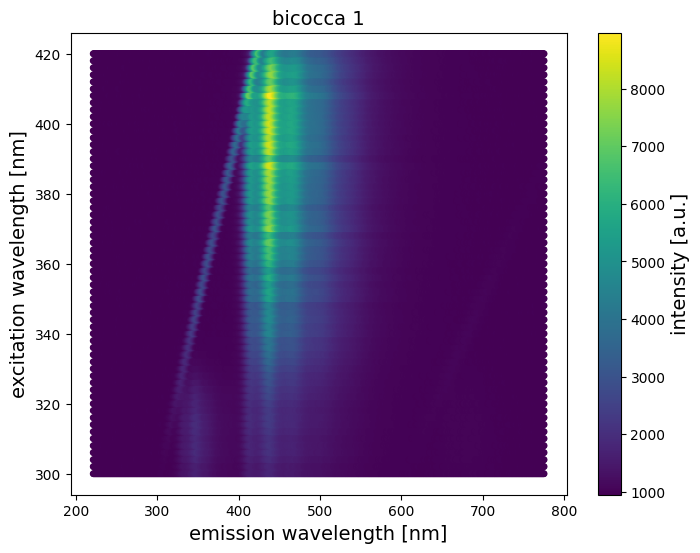

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(b1.x, b1.y, c=b1.z, cmap='viridis', marker='o', s=15)

# Aggiunta di titoli e etichette
plt.title('bicocca 1', size=14)
plt.xlabel('emission wavelength [nm]', size=14)
plt.ylabel('excitation wavelength [nm]', size=14)
cbar = plt.colorbar()
cbar.set_label(label='intensity [a.u.]', size=14)
#plt.grid()
plt.show()

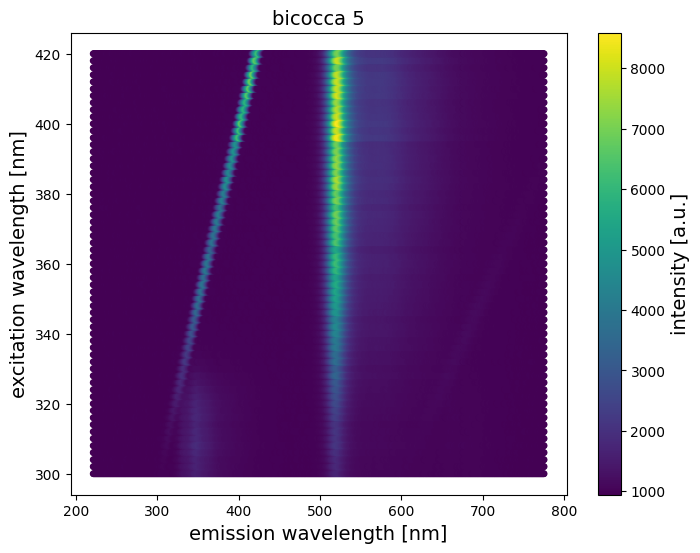

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(b5.x, b5.y, c=b5.z, cmap='viridis', marker='o', s=15)

# Aggiunta di titoli e etichette
plt.title('bicocca 5', size=14)
plt.xlabel('emission wavelength [nm]', size=14)
plt.ylabel('excitation wavelength [nm]', size=14)
cbar = plt.colorbar()
cbar.set_label(label='intensity [a.u.]', size=14)
#plt.grid()
plt.show()

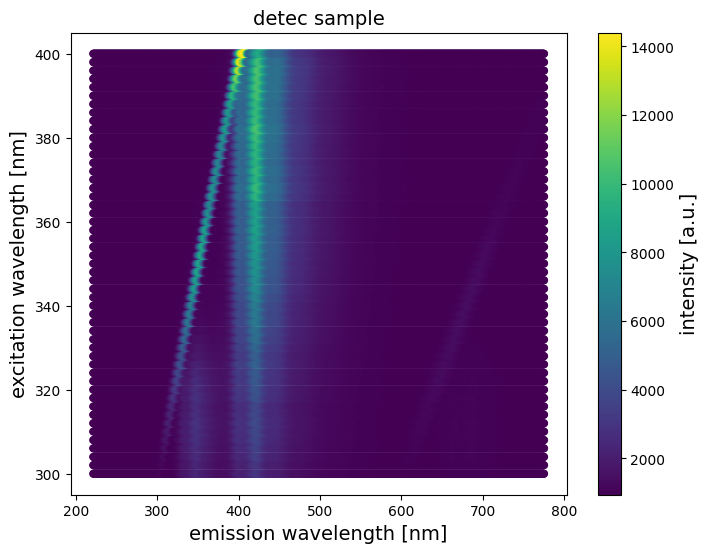

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(dt.query('y<400').x, dt.query('y<400').y, c=dt.query('y<400').z, cmap='viridis', marker='o', s=23)

# Aggiunta di titoli e etichette
plt.title('detec sample', size=14)
plt.xlabel('emission wavelength [nm]', size=14)
plt.ylabel('excitation wavelength [nm]', size=14)
cbar = plt.colorbar()
cbar.set_label(label='intensity [a.u.]', size=14)
#plt.grid()
plt.show()

In [35]:

b1['z1'] = np.where((0.97 < b1['y'] / b1['x']) & (b1['y'] / b1['x'] < 1.03), b1.z.min(), b1['z'])

b5['z1'] = np.where((0.97 < b5['y'] / b5['x']) & (b5['y'] / b5['x'] < 1.03), b5.z.min(), b5['z'])

dt['z1'] = np.where((0.97 < dt['y'] / dt['x']) & (dt['y'] / dt['x'] < 1.03), dt.z.min(), dt['z'])

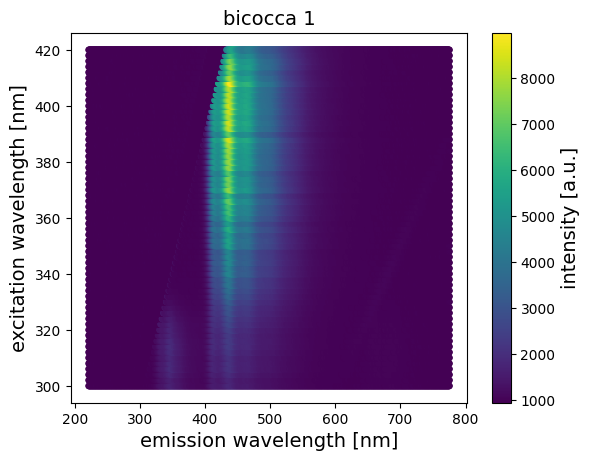

In [36]:
plt.scatter(b1.x, b1.y, c=b1.z1, cmap='viridis', marker='o', s=15)
# Aggiunta di titoli e etichette
plt.title('bicocca 1', size=14)
plt.xlabel('emission wavelength [nm]', size=14)
plt.ylabel('excitation wavelength [nm]', size=14)
cbar = plt.colorbar()
cbar.set_label(label='intensity [a.u.]', size=14)
#plt.grid()
plt.show()

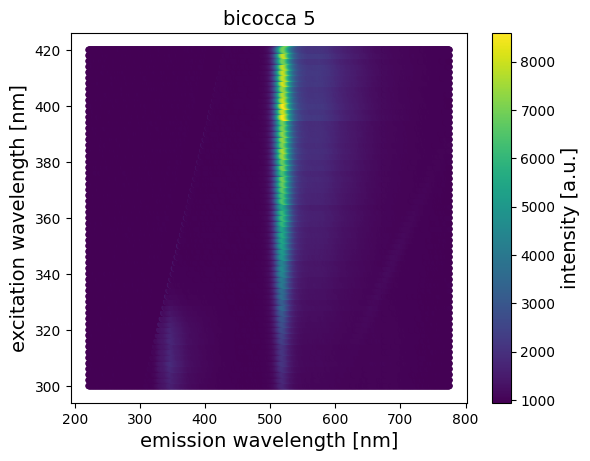

In [11]:
plt.scatter(b5.x, b5.y, c=b5.z1, cmap='viridis', marker='o', s=15)
# Aggiunta di titoli e etichette
plt.title('bicocca 5', size=14)
plt.xlabel('emission wavelength [nm]', size=14)
plt.ylabel('excitation wavelength [nm]', size=14)
cbar = plt.colorbar()
cbar.set_label(label='intensity [a.u.]', size=14)
#plt.grid()
plt.show()

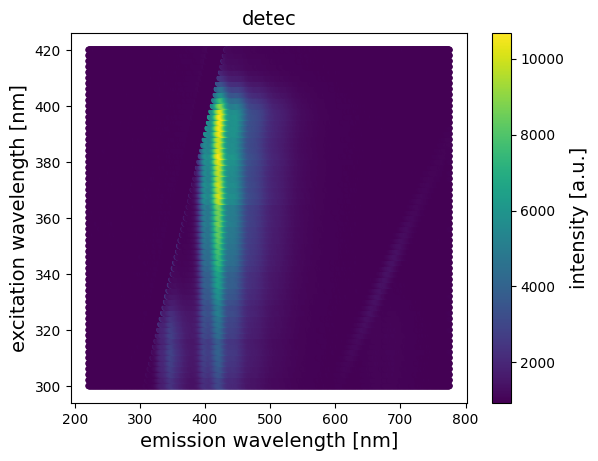

In [12]:
plt.scatter(dt.x, dt.y, c=dt.z1, cmap='viridis', marker='o', s=15)
# Aggiunta di titoli e etichette
plt.title('detec', size=14)
plt.xlabel('emission wavelength [nm]', size=14)
plt.ylabel('excitation wavelength [nm]', size=14)
cbar = plt.colorbar()
cbar.set_label(label='intensity [a.u.]', size=14)
#plt.grid()
plt.show()

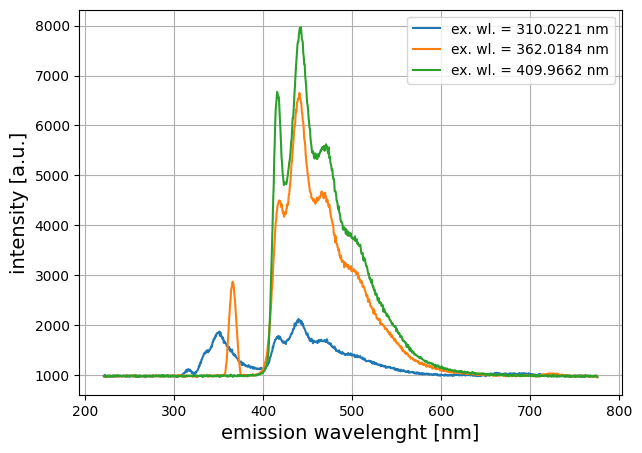

In [37]:
fig = plt.figure(figsize=(7, 5))

l = 310.0221
plt.plot(b1.query(f'y=={l}').x, b1.query(f'y=={l}').z, label=f'ex. wl. = {l} nm')

l = 362.0184
plt.plot(b1.query(f'y=={l}').x, b1.query(f'y=={l}').z, label=f'ex. wl. = {l} nm')

l = 409.9662
plt.plot(b1.query(f'y=={l}').x, b1.query(f'y=={l}').z, label=f'ex. wl. = {l} nm')

plt.xlabel('emission wavelenght [nm]', size=14)
plt.ylabel('intensity [a.u.]', size=14)
plt.grid()
plt.legend()

In [68]:
y = b1.x.unique()
y[(y>520)&(y<570)]

array([520.0338, 520.575 , 521.1161, 521.6573, 522.1984, 522.7395,
       523.2806, 523.8217, 524.3628, 524.9039, 525.4449, 525.9859,
       526.527 , 527.068 , 527.609 , 528.1499, 528.6909, 529.2318,
       529.7728, 530.3137, 530.8546, 531.3954, 531.9363, 532.4772,
       533.018 , 533.5588, 534.0996, 534.6404, 535.1812, 535.722 ,
       536.2627, 536.8035, 537.3442, 537.8849, 538.4256, 538.9663,
       539.5069, 540.0476, 540.5882, 541.1288, 541.6694, 542.21  ,
       542.7506, 543.2911, 543.8317, 544.3722, 544.9127, 545.4532,
       545.9937, 546.5341, 547.0746, 547.615 , 548.1554, 548.6958,
       549.2362, 549.7766, 550.3169, 550.8573, 551.3976, 551.9379,
       552.4782, 553.0185, 553.5588, 554.099 , 554.6393, 555.1795,
       555.7197, 556.2599, 556.8   , 557.3402, 557.8803, 558.4205,
       558.9606, 559.5007, 560.0408, 560.5808, 561.1209, 561.6609,
       562.2009, 562.7409, 563.2809, 563.8209, 564.3609, 564.9008,
       565.4407, 565.9806, 566.5205, 567.0604, 567.6003, 568.1

Text(0.5, 1.0, 'bicocca1')

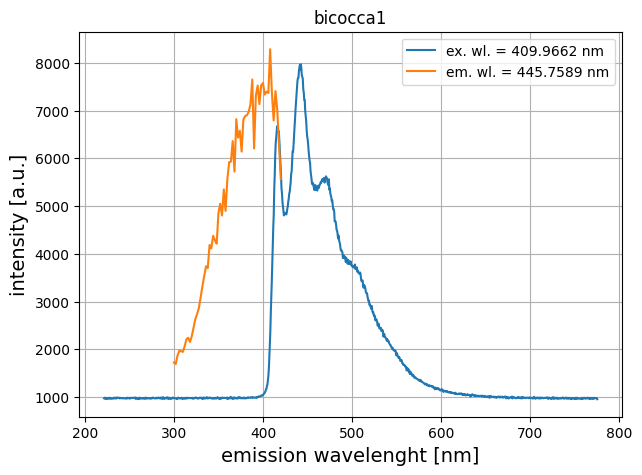

In [66]:
fig = plt.figure(figsize=(7, 5))

l = 409.9662
plt.plot(b1.query(f'y=={l}').x, b1.query(f'y=={l}').z, label=f'ex. wl. = {l} nm')

l = 445.7589
plt.plot(b1.query(f'x=={l}').y, b1.query(f'x=={l}').z, label=f'em. wl. = {l} nm')

plt.xlabel('emission wavelenght [nm]', size=14)
plt.ylabel('intensity [a.u.]', size=14)
plt.grid()
plt.legend()
plt.title('bicocca1')

Text(0.5, 1.0, 'bicocca5')

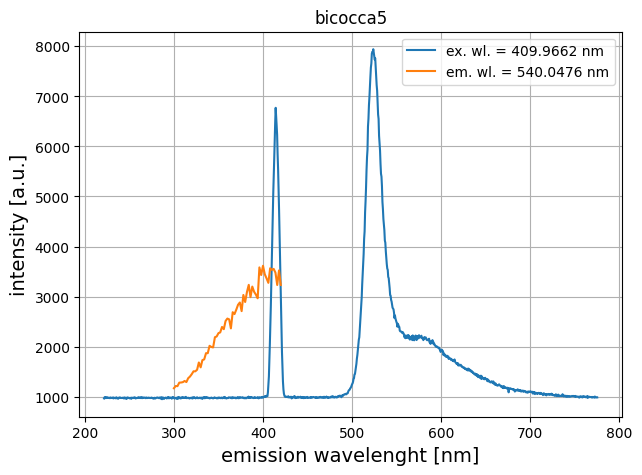

In [69]:
fig = plt.figure(figsize=(7, 5))

l = 409.9662
plt.plot(b5.query(f'y=={l}').x, b5.query(f'y=={l}').z, label=f'ex. wl. = {l} nm')

l = 540.0476
plt.plot(b5.query(f'x=={l}').y, b5.query(f'x=={l}').z, label=f'em. wl. = {l} nm')

plt.xlabel('emission wavelenght [nm]', size=14)
plt.ylabel('intensity [a.u.]', size=14)
plt.grid()
plt.legend()
plt.title('bicocca5')

In [38]:
y0 = b1.y.unique()[0]
x0 = b1.x.unique()[0]

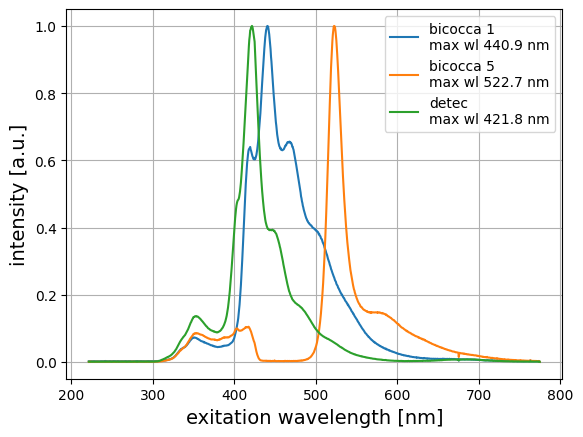

In [39]:
dd = b1#.query(cut)
frame = b1.query(f'y=={y0}')
cv = frame.x.values
binwidth = abs(cv[1]-cv[0])/2
xbins = cv - binwidth
fxbins = np.append(xbins, [xbins[-1]+binwidth])
hy, hx = np.histogram(dd.x , weights=dd.z/len(dd.y.unique()), bins=fxbins)
hx = (hx[1:]+hx[:-1])/2
hy = hy - np.min(hy)
hy = hy/np.max(hy)
maxwl = hx[np.argmax(hy)]
plt.plot(hx, hy, label = f'bicocca 1\nmax wl {maxwl:.1f} nm')

dd = b5#.query(cut)
frame = b1.query(f'y=={y0}')
cv = frame.x.values
binwidth = abs(cv[1]-cv[0])/2
xbins = cv - binwidth
fxbins = np.append(xbins, [xbins[-1]+binwidth])
hy, hx = np.histogram(dd.x , weights=dd.z/len(dd.y.unique()), bins=fxbins)
hx = (hx[1:]+hx[:-1])/2
hy = hy - np.min(hy)
hy = hy/np.max(hy)
maxwl = hx[np.argmax(hy)]
plt.plot(hx, hy, label = f'bicocca 5\nmax wl {maxwl:.1f} nm')


dd = dt#.query(cut)
frame = b1.query(f'y=={y0}')
cv = frame.x.values
binwidth = abs(cv[1]-cv[0])/2
xbins = cv - binwidth
fxbins = np.append(xbins, [xbins[-1]+binwidth])
hy, hx = np.histogram(dd.x , weights=dd.z/len(dd.y.unique()), bins=fxbins)
hx = (hx[1:]+hx[:-1])/2
hy = hy - np.min(hy)
hy = hy/np.max(hy)
maxwl = hx[np.argmax(hy)]
plt.plot(hx, hy, label = f'detec\nmax wl {maxwl:.1f} nm')


plt.ylabel('intensity [a.u.]', size=14)
plt.xlabel('exitation wavelength [nm]', size=14)
plt.legend()
plt.grid()
plt.show()

In [41]:
cut = 'y<380'

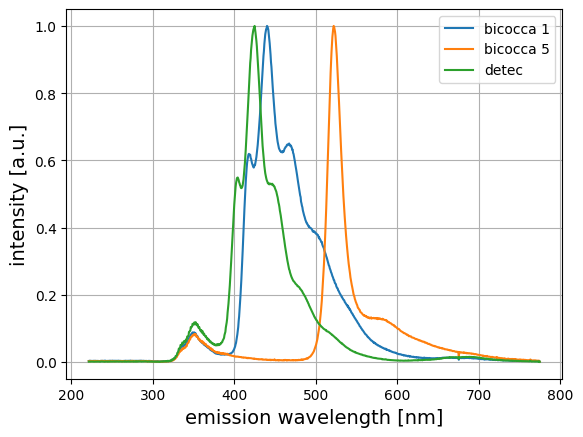

In [42]:
dd = b1.query(cut)
frame = b1.query(f'y=={y0}')
cv = frame.x.values
binwidth = abs(cv[1]-cv[0])/2
xbins = cv - binwidth
fxbins = np.append(xbins, [xbins[-1]+binwidth])
hy, hx = np.histogram(dd.x , weights=dd.z1/len(dd.y.unique()), bins=fxbins)
hx = (hx[1:]+hx[:-1])/2
hy = hy - np.min(hy)
hy = hy/np.max(hy)
plt.plot(hx, hy, label = 'bicocca 1')

dd = b5.query(cut)
frame = b1.query(f'y=={y0}')
cv = frame.x.values
binwidth = abs(cv[1]-cv[0])/2
xbins = cv - binwidth
fxbins = np.append(xbins, [xbins[-1]+binwidth])
hy, hx = np.histogram(dd.x , weights=dd.z1/len(dd.y.unique()), bins=fxbins)
hx = (hx[1:]+hx[:-1])/2
hy = hy - np.min(hy)
hy = hy/np.max(hy)
plt.plot(hx, hy, label = 'bicocca 5')

dd = dt.query(cut)
frame = b1.query(f'y=={y0}')
cv = frame.x.values
binwidth = abs(cv[1]-cv[0])/2
xbins = cv - binwidth
fxbins = np.append(xbins, [xbins[-1]+binwidth])
hy, hx = np.histogram(dd.x , weights=dd.z1/len(dd.y.unique()), bins=fxbins)
hx = (hx[1:]+hx[:-1])/2
hy = hy - np.min(hy)
hy = hy/np.max(hy)
plt.plot(hx, hy, label = 'detec')


plt.ylabel('intensity [a.u.]', size=14)
plt.xlabel('emission wavelength [nm]', size=14)
plt.legend()
plt.grid()
plt.show()

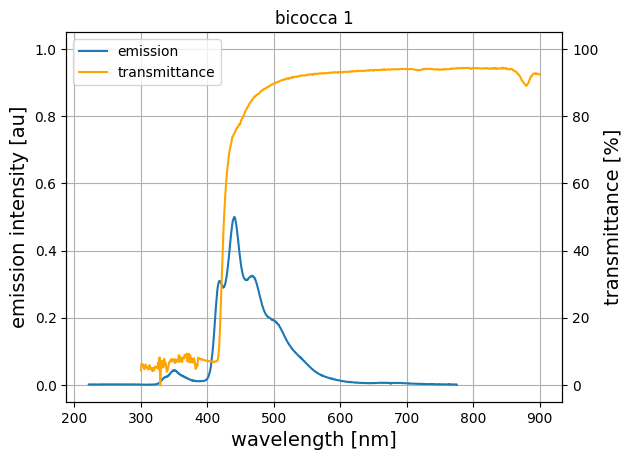

In [59]:
dd = b1.query(cut)
frame = b1.query(f'y=={y0}')
cv = frame.x.values
binwidth = abs(cv[1]-cv[0])/2
xbins = cv - binwidth
fxbins = np.append(xbins, [xbins[-1]+binwidth])
hy, hx = np.histogram(dd.x , weights=dd.z1/len(dd.y.unique()), bins=fxbins)
hx = (hx[1:]+hx[:-1])/2
hy = hy - np.min(hy)
hy = hy/np.max(hy)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Crea una seconda scala y sovrapposta
l1, = ax1.plot(hx, hy/2, label='emission')
l2, = ax2.plot(b1_T_bis.wl, b1_T_bis.Tr, label='transmittance', color='orange')  # Traccia il plot della trasmissione
ax1.set_ylabel('emission intensity [au]', size=14)  # Etichetta y per il plot dell'emissione
ax2.set_ylabel('transmittance [%]', size=14)  # Etichetta y per il plot della trasmissione
ax1.set_xlabel('wavelength [nm]', size=14)  # Etichetta x
plt.legend(handles=[l1, l2], loc='upper left')
plt.title('bicocca 1')  # Titolo del grafico
ax1.set_ylim(-0.05, 1.05)
ax2.set_ylim(-0.05*100, 1.05*100)
ax1.grid()  # Mostra la griglia
plt.show()

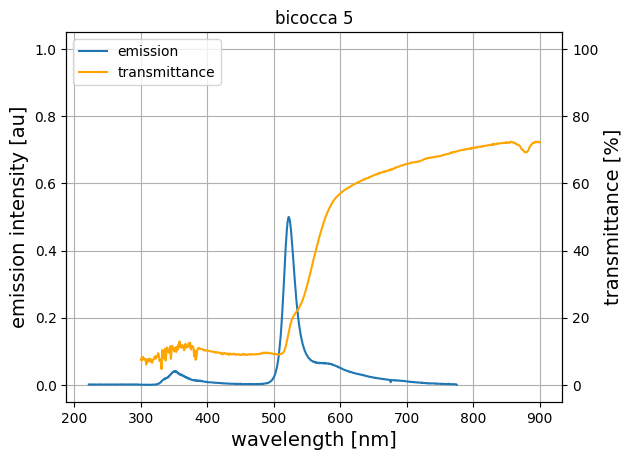

In [58]:
dd = b5.query(cut)
frame = b5.query(f'y=={y0}')
cv = frame.x.values
binwidth = abs(cv[1]-cv[0])/2
xbins = cv - binwidth
fxbins = np.append(xbins, [xbins[-1]+binwidth])
hy, hx = np.histogram(dd.x , weights=dd.z1/len(dd.y.unique()), bins=fxbins)
hx = (hx[1:]+hx[:-1])/2
hy = hy - np.min(hy)
hy = hy/np.max(hy)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Crea una seconda scala y sovrapposta
l1, = ax1.plot(hx, hy/2, label='emission')
l2, = ax2.plot(b5_T_bis.wl, b5_T_bis.Tr, label='transmittance', color='orange')  # Traccia il plot della trasmissione
ax1.set_ylabel('emission intensity [au]', size=14)  # Etichetta y per il plot dell'emissione
ax2.set_ylabel('transmittance [%]', size=14)  # Etichetta y per il plot della trasmissione
ax1.set_xlabel('wavelength [nm]', size=14)  # Etichetta x
plt.legend(handles=[l1, l2], loc='upper left')
plt.title('bicocca 5')  # Titolo del grafico
ax1.set_ylim(-0.05, 1.05)
ax2.set_ylim(-0.05*100, 1.05*100)
ax1.grid()  # Mostra la griglia
plt.show()